In [12]:
from src.data.load_final_data import load_final_movies_and_reviews
from src.utils.initial_plots_data import plot_movies_over_time_months, plot_movies_over_time_years, plot_pie_genres_proportion, plot_donut_top_countries
from src.data.data_wrangling import load_and_clean_movies_df
from src.data.load_data_reviews_kaggle import load_movie_reviews_kaggle
from src.data.load_data_non_commercial_imdb import load_imdb_id_wikipedia_id, load_imdb_average_reviews
from src.data.predict_emotions import predict_emotions_to_tsv, merge_df_with_emotions_tsv, predict_emotions_to_tsv, merge_df_with_emotions_tsv
from src.scripts.scrap_date import scrap_years_months_movies, get_final_dates
from src.scripts.scrap_reviews import scrape_reviews
from src.data.normalize_emotions import normalize_total_plot_emotions, normalize_review_emotions
from src.data.top10_words_plot import show_top_10_words_per_emotion

# If you have any problem with NLTK restart your kernel and run this:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')


# Make sure that if any dependencies changes it will be reflected in the notebook (From the ML course)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Scripts to create and process our datasets 
(We do not recommand running theses functions. We ran some of them for multiple days):

Load movie metadata:

`df_movies_metadata, df_movies_language, df_movies_countries, df_movies_genres = load_and_clean_movies_df()`

Load movie reviews from kaggle:

`df_reviews_kaggle = load_movie_reviews_kaggle(df_movies_metadata)`

Load mapping IMDB id to wikipedia ID:

`df_mapping_imdb_id_wikipedia_id = load_imdb_id_wikipedia_id(df_movies_metadata)`

Load movie average reviews from the non-commercial IMDB:

`df_imdb_average_reviews = load_imdb_average_reviews(df_mapping_imdb_id_wikipedia_id)`

### Predict emotions

Compute plot emotions:

`predict_emotions_to_tsv(df_movies, column='plot', file_name='plot_emotions.tsv')`

Merging df_movies with plot_emotions.tsv:

`df_movies_with_emotions = merge_df_with_emotions_tsv(df_movies, file_name='plot_emotions.tsv', prefix='plot')`

Compute review emotions:
`predict_emotions_to_tsv(df_reviews, column='review_detail', file_name='review_emotions.tsv, is_review=True')`

Merging df_reviews with review_emotions.tsv:

`df_reviews_with_emotions = merge_df_with_emotions_tsv(df_reviews, file_name='review_emotions.tsv', prefix='review', is_review=True)`

### Scrap more years and months:
We scrap our years and months data using:

`scrap_years_months_movies(df_movies_metadata)`

Then we load the resulting csv and combine both data (from both the original dataset and scrapped data):

`get_final_dates(pd.read_csv("dates_scraped.csv"))`

### Scrap more reviews:

`scrape_reviews(df_mapping_imdb_id_wikipedia_id)`

### Scripts to normalize emotion scores
We normalize the plot emotion scores using: 

`df_movies_with_emotions_normalized = normalize_total_plot_emotions(df_movies_with_emotions, with_neutral=False)`

We normalize the review emotion scores using: 

`df_reviews_with_emotions_normalized = normalize_review_emotions(df_reviews_with_emotions, with_neutral=False)`

# Scripts to create and load our final data
Note: You need at least the files 'final_movies.csv' and 'final_reviews.csv' and 'movie.metadata.tsv' (More information in the README)

In [2]:
df_movies, df_language, df_countries, df_genres, df_reviews = load_final_movies_and_reviews()

In [3]:
df_movies_with_emotions = merge_df_with_emotions_tsv(
    df_movies, 
    file_name='plot_emotions.tsv', 
    prefix='plot'
)

In [4]:
df_movies_with_emotions_normalized = normalize_total_plot_emotions(
    df_movies_with_emotions, 
    with_neutral=False
)

In [5]:
print("Our dataset has {} different movies".format(len(df_movies_with_emotions_normalized)))
print("Without combining any genres, we have {} different genres".format(df_genres.shape[1]))
print("We also have {} different countries".format(df_countries.shape[1]))
print("Finally, we have {} different languages".format(df_language.shape[1]))

Our dataset has 11564 different movies
Without combining any genres, we have 336 different genres
We also have 105 different countries
Finally, we have 151 different languages


#### Let have a look at the movies released over time in our data set

we plot the movie releases over time with month precision and year precision:

ConversionError: Failed to convert value(s) to axis units: ['1913', '1923', '1933', '1943', '1953', '1963', '1973', '1983', '1993', '2003', '2013']

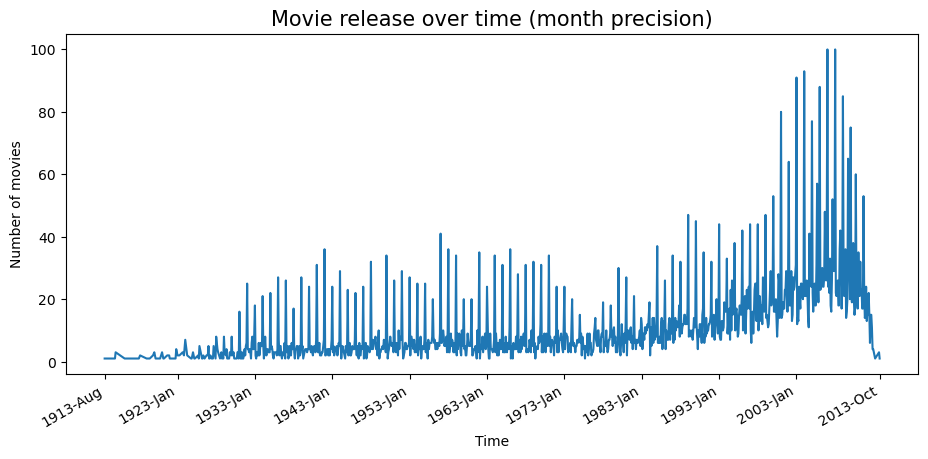

<Figure size 640x480 with 0 Axes>

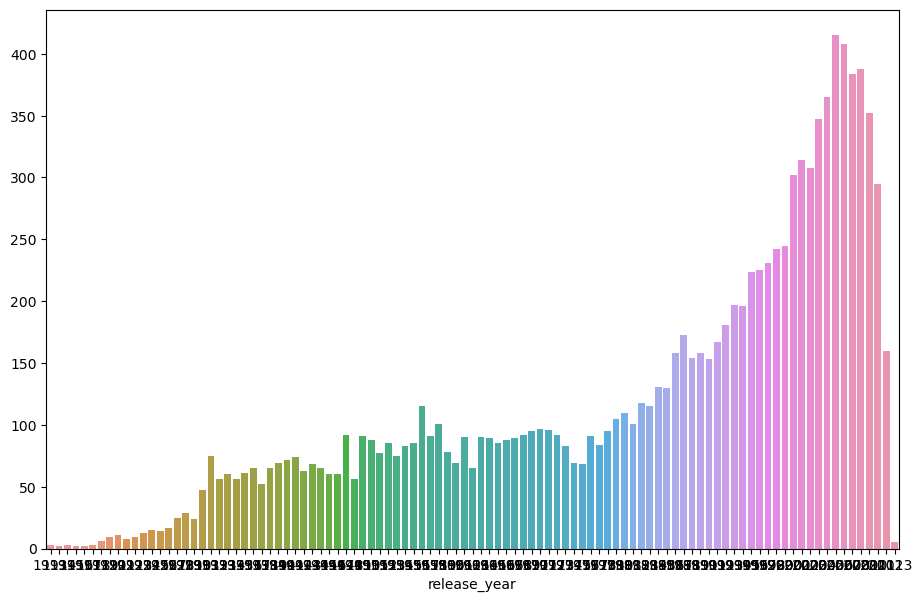

In [27]:
plot_movies_over_time_months(df_movies)
plot_movies_over_time_years(df_movies)

We can clearly see an increase of movies releases over time.

#### Now let's look at the different genres present

We plot the genres distribution in movies:

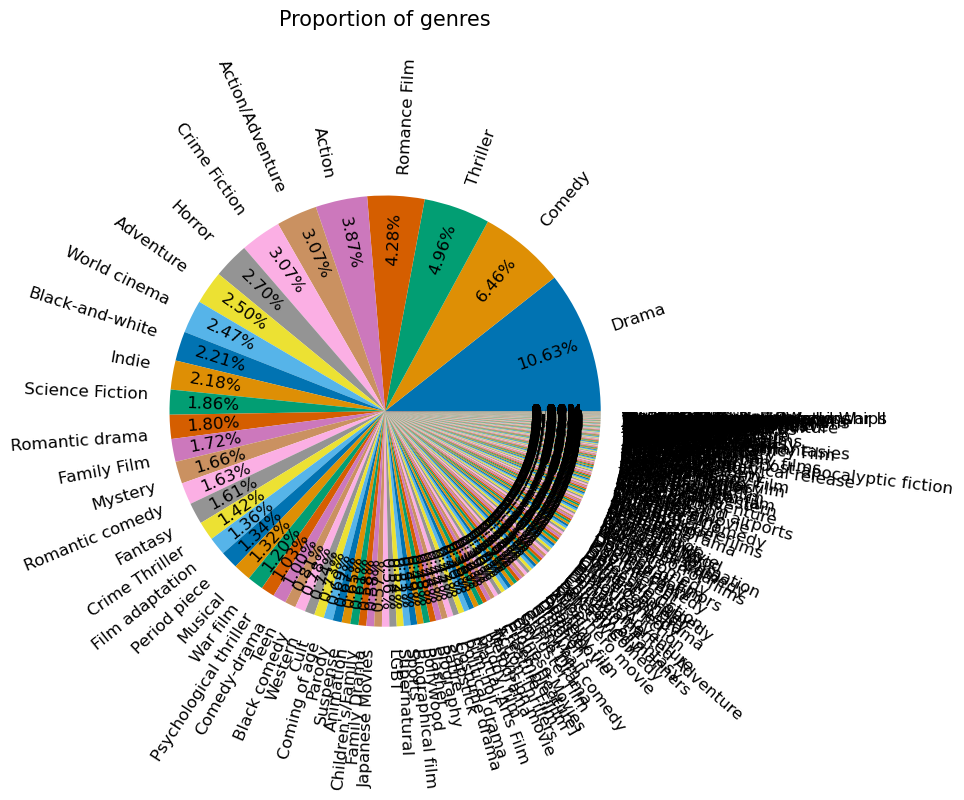

In [7]:
plot_pie_genres_proportion(df_genres)

We can see that with the initial 336 genres, this is hard to clearly visualize their proportion.

Therefore we decided to classify these 336 genres into 22 main genres.

We plot the distribution of these 22 main genres in movies:

In [ ]:
##TODO plot avec que 22

#### Then let's have a look at the top 10 countries

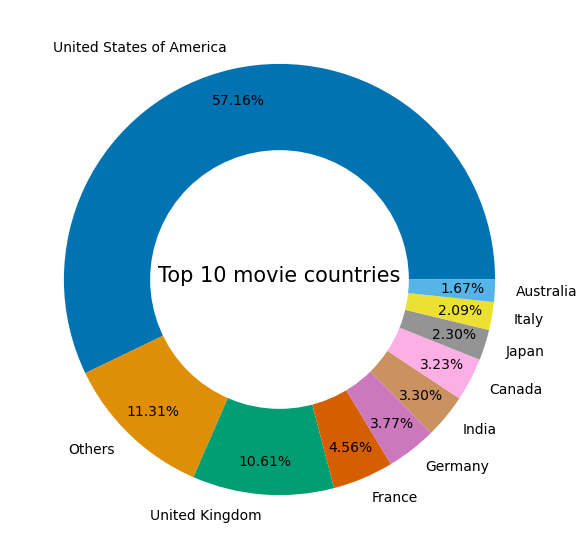

In [8]:
plot_donut_top_countries(df_countries, top=10)

As we can see, the United States of America and the United Kingdom takes together more than 65 % of the appearing countries in our dataset
Let's look at this donut chart without considering both of theses:

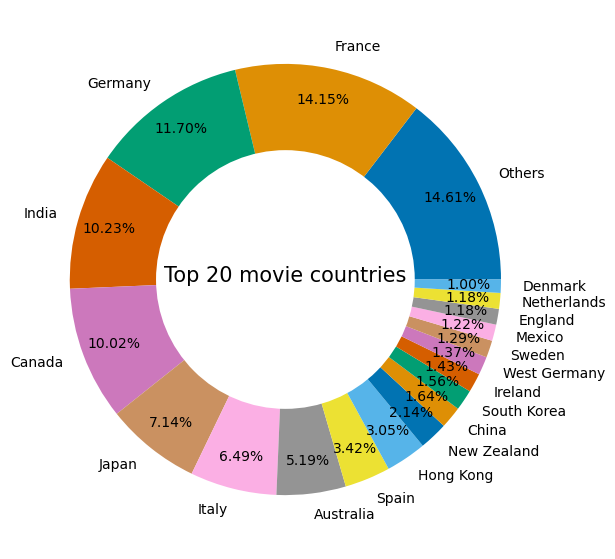

In [9]:
plot_donut_top_countries(df_countries, top=20, exclude_countries=["United States of America", "United Kingdom"])

Here we have a cleaner view of the consumers' country and we see that there are mostly developed countries.

#### Let's see the top 10 words in plots for each emotions

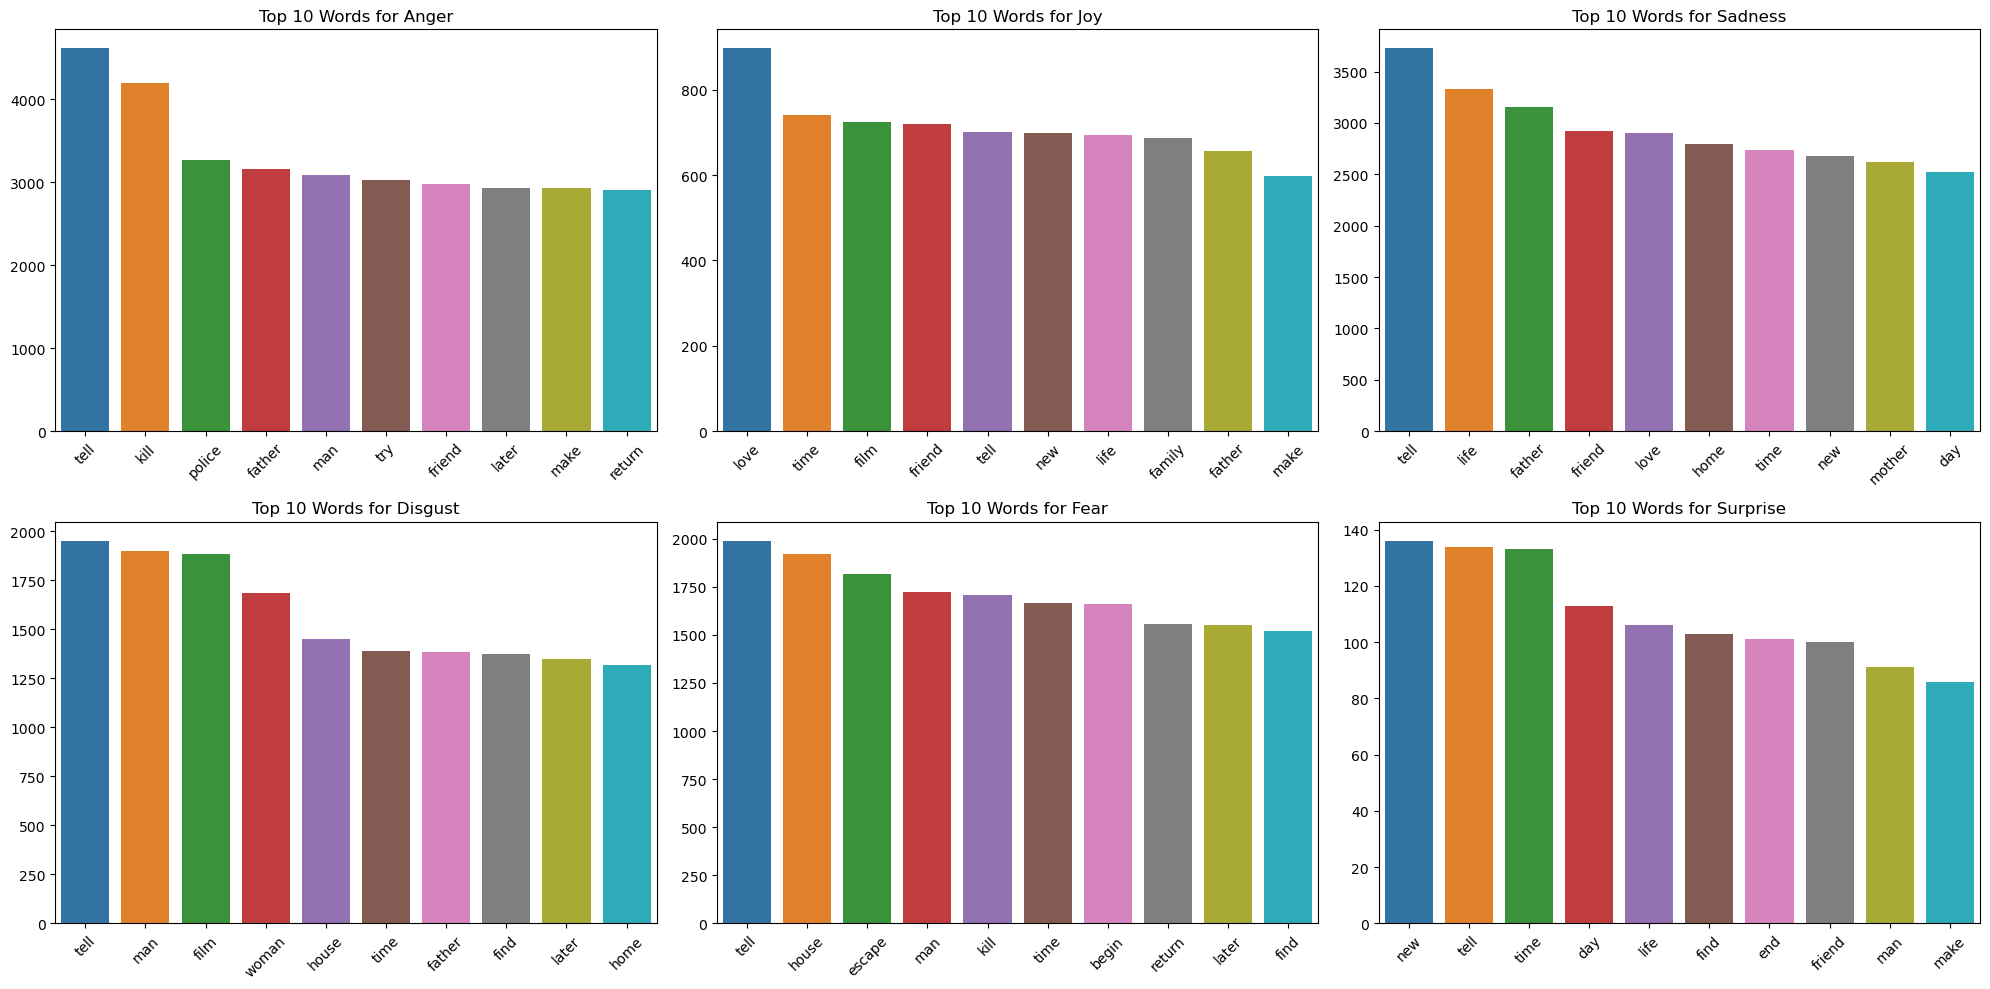

In [10]:
show_top_10_words_per_emotion(df_movies_with_emotions_normalized, top_emotions=1)